#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [26]:
import numpy as np
import itertools
import random
import time

In [27]:
weights= np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [28]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    best = 0
    bestSet = []
    allChoices = itertools.product([0,1],repeat=len(self.profits))
    for choice in allChoices:
      weight = sum(self.weights[i] for i in range(len(self.weights)) if choice[i])
      if weight<=self.capacity:
        currentProfit = sum(self.profits[i] for i in range(len(self.weights)) if choice[i])
        if currentProfit>best:
          best,bestSet=currentProfit,choice

    # prepare answer
    return {"profit": best, "indexes":bestSet}


  def solve_knapsack_pw_ratio(self):
    ratios = {i:self.profits[i]/self.weights[i] for i in range(len(self.profits))} # dict of all ratios, by index
    #print(ratios)
    ratios = sorted(ratios,key=ratios.get,reverse=True) # list of best valued indexes, first element is the best and so on
    # keep adding elements until capacity reached
    result = [0]*len(self.weights)
    currentWeight=0
    currentProfit=0
    toAdd=0 # which index from the available items will be added next
    while toAdd<len(self.weights) and currentWeight+self.weights[ratios[toAdd]]<=self.capacity:
      result[ratios[toAdd]]=1
      currentWeight+=self.weights[ratios[toAdd]]
      currentProfit+=self.profits[ratios[toAdd]]
      toAdd+=1
    return {"profit": currentProfit, "indexes":result}


In [29]:
### example

knapsack1  = KnapSack(profits,weights,capacity)
print("brute:",knapsack1.solve_knapsack_brute_force())
print("heuristics by ratio:",knapsack1.solve_knapsack_pw_ratio())

brute: {'profit': 17, 'indexes': (0, 1, 1, 0)}
heuristics by ratio: {'profit': 14, 'indexes': [0, 1, 0, 1]}


In [30]:
### now benchmark both methods, with increasing items count
### this takes about 20 seconds

simulationSize = 20
plotData = {'brute':[0]*simulationSize, 'heuristic':[0]*simulationSize}

knapsack2 = KnapSack([],[],10)
for count in range(simulationSize):

    knapsack2.profits=np.append(knapsack2.profits,random.randint(1,10))
    knapsack2.weights=np.append(knapsack2.weights,random.randint(1,10))

    bruteStart = time.time()
    knapsack2.solve_knapsack_brute_force()
    plotData['brute'][count]=time.time()-bruteStart

    heurStart = time.time()
    knapsack2.solve_knapsack_pw_ratio()
    plotData['heuristic'][count]=time.time()-heurStart

#print(plotData)





Text(0, 0.5, 'Time (seconds)')

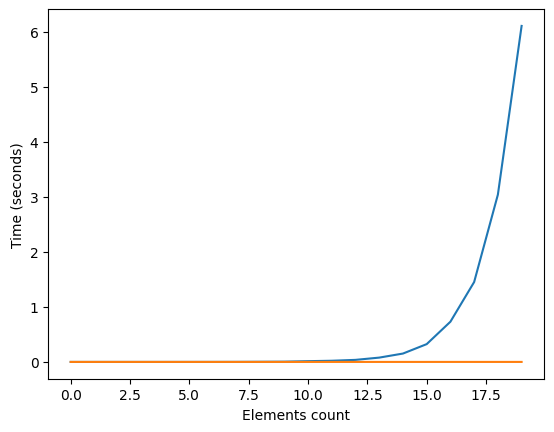

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

# elements to choose from vs time it took
plt.plot(range(simulationSize),plotData['brute'])
plt.plot(range(simulationSize),plotData['heuristic'])
plt.xlabel("Elements count")
plt.ylabel("Time (seconds)")

# Wnioski
* Metoda brute force, choć jest wolna, to gwarantuje poprawne rozwiązanie. Ma złożoność O(2^n), ponieważ każdy element można albo wziąć, albo nie
* Metoda zachłanna ma złożoność zaledwie O(n), lecz nie gwarantuje najlepszego rozwiązania, ponieważ na przykład zamiast brać jakiś przedmiot X, lepiej jest wziąć dwa inne o gorszym współczynniku, które lepiej uzupełnią plecak, czego ta metoda nie jest w stanie sprawdzić.